In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open('../Result/edges.json') as f:
    year_edges = json.load(f)

In [3]:
year_edges

{'2022': [[321, 204],
  [684, 781],
  [358, 122],
  [658, 234],
  [908, 0],
  [957, 530],
  [287, 327],
  [546, 816],
  [202, 1006],
  [474, 153],
  [927, 544],
  [301, 756],
  [286, 856],
  [321, 734],
  [46, 386],
  [972, 286],
  [396, 764],
  [513, 1020],
  [279, 853],
  [868, 85],
  [419, 338],
  [123, 196],
  [401, 964],
  [448, 401],
  [662, 510],
  [192, 332],
  [244, 1016],
  [630, 414],
  [19, 489],
  [46, 363],
  [915, 403],
  [431, 204],
  [358, 894],
  [474, 431],
  [153, 196],
  [659, 971],
  [1014, 790],
  [785, 967],
  [1020, 455],
  [688, 131],
  [334, 802],
  [408, 342],
  [480, 447],
  [402, 936],
  [966, 749],
  [877, 3],
  [872, 562],
  [731, 65],
  [448, 908],
  [486, 117],
  [202, 358],
  [743, 304],
  [68, 623],
  [75, 519],
  [200, 25],
  [833, 871],
  [633, 437],
  [123, 186],
  [947, 304],
  [1018, 364],
  [805, 894],
  [321, 27],
  [718, 746],
  [734, 196],
  [630, 633],
  [883, 813],
  [710, 513],
  [129, 122],
  [1003, 878],
  [735, 835],
  [620, 210],
  [2

In [23]:
all_edges = []
for year in year_edges:
    print(year, len(year_edges[year]))
    for edge in year_edges[year]:
        all_edges.append((edge[0], edge[1]))

2022 1850
2021 1266
2020 1421
2019 1645
2018 1265
2017 1187
2016 1270
2015 1103
2014 1123
2013 817
2012 760
2011 690
2010 592
2009 687
2008 614
2007 405
2006 353
2024 246
2023 1576
2005 355
2004 278
2003 266
2002 152
2001 121
2000 104
1997 56
1999 85
1998 71
1995 32
1993 20
1992 9
1991 10
1994 29
1990 10
1986 3
1984 3
1982 2
1996 34
1989 4
1988 4
1987 1


In [24]:
all_edges= list(set(all_edges))

In [25]:
len(all_edges)

8741

In [26]:
#construct undirected graph
G = nx.Graph()
G.add_edges_from(all_edges)

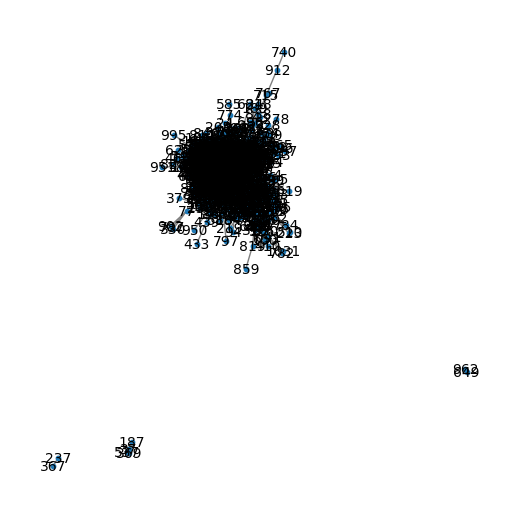

In [27]:
#draw graph
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, font_size=10, node_size=10, edge_color='gray')
plt.show()

In [28]:
#analyze graph
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Average degree:', sum(dict(G.degree()).values())/G.number_of_nodes())
print('Number of connected components:', nx.number_connected_components(G))
print('Size of largest connected component:', len(max(nx.connected_components(G), key=len)))

Number of nodes: 964
Number of edges: 7316
Average degree: 15.178423236514522
Number of connected components: 4
Size of largest connected component: 956


In [29]:
#analyze degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

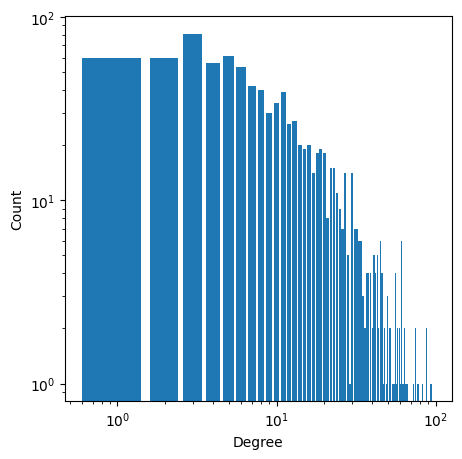

In [30]:
plt.figure(figsize=(5,5))
plt.bar(degree_count.keys(), degree_count.values())
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [31]:
#analyze clustering coefficient
print('Average clustering coefficient:', nx.average_clustering(G))


Average clustering coefficient: 0.3247214630954158


In [32]:
#analyze shortest path in giant component
giant_component = max(nx.connected_components(G), key=len)
G_giant = G.subgraph(giant_component)
print('Number of nodes in giant component:', G_giant.number_of_nodes())
print('Number of edges in giant component:', G_giant.number_of_edges())
print('Average degree in giant component:', sum(dict(G_giant.degree()).values())/G_giant.number_of_nodes())
print('Average shortest path length in giant component:', nx.average_shortest_path_length(G_giant))
print('Diameter of giant component:', nx.diameter(G_giant))

Number of nodes in giant component: 956
Number of edges in giant component: 7308
Average degree in giant component: 15.288702928870293
Average shortest path length in giant component: 3.270183355604723
Diameter of giant component: 10


In [33]:
#analyse centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

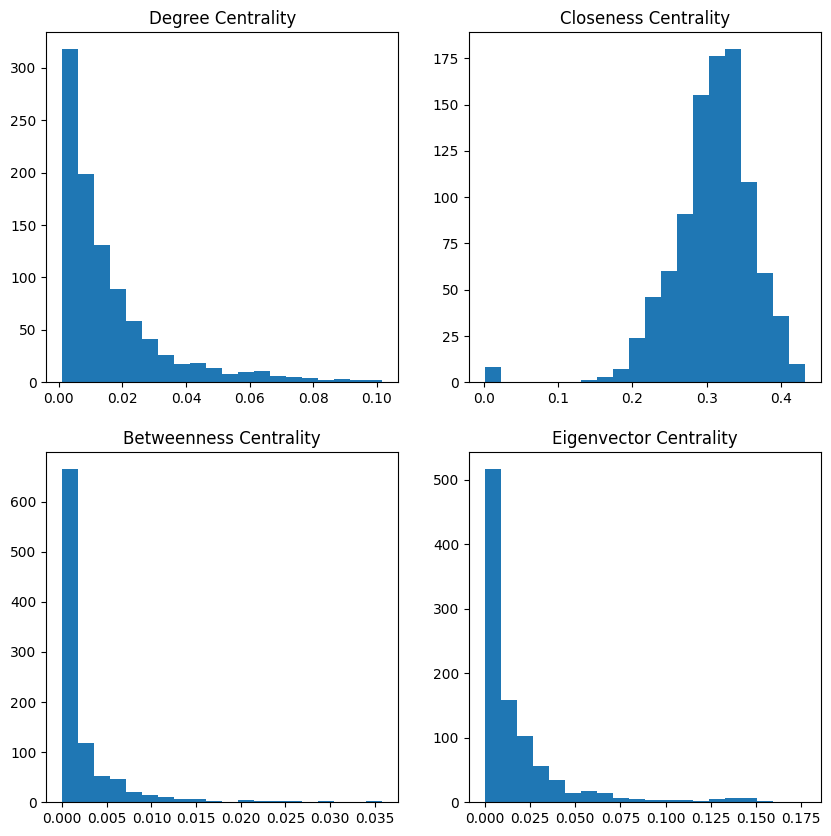

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(degree_centrality.values(), bins=20)
axs[0, 0].set_title('Degree Centrality')
axs[0, 1].hist(closeness_centrality.values(), bins=20)
axs[0, 1].set_title('Closeness Centrality')
axs[1, 0].hist(betweenness_centrality.values(), bins=20)
axs[1, 0].set_title('Betweenness Centrality')
axs[1, 1].hist(eigenvector_centrality.values(), bins=20)
axs[1, 1].set_title('Eigenvector Centrality')
plt.show()

In [35]:
#analyze density
print('Density:', nx.density(G))


Density: 0.015761602530129308


# Yearly Graph Analysis

In [38]:
year_infos={}
for y in year_edges:
    print(y)
    G = nx.Graph()
    G.add_edges_from(year_edges[y])
    print('Number of nodes:', G.number_of_nodes())
    print('Number of edges:', G.number_of_edges())
    print('Average degree:', sum(dict(G.degree()).values())/G.number_of_nodes())
    print('Number of connected components:', nx.number_connected_components(G))
    print('Size of largest connected component:', len(max(nx.connected_components(G), key=len)))
    print('Average clustering coefficient:', nx.average_clustering(G))
    giant_component = max(nx.connected_components(G), key=len)
    G_giant = G.subgraph(giant_component)
    print('Number of nodes in giant component:', G_giant.number_of_nodes())
    print('Number of edges in giant component:', G_giant.number_of_edges())
    print('Average degree in giant component:', sum(dict(G_giant.degree()).values())/G_giant.number_of_nodes())
    print('Average shortest path length in giant component:', nx.average_shortest_path_length(G_giant))
    print('Diameter of giant component:', nx.diameter(G_giant))
    # degree_centrality = nx.degree_centrality(G)
    # closeness_centrality = nx.closeness_centrality(G)
    # betweenness_centrality = nx.betweenness_centrality(G)
    # eigenvector_centrality = nx.eigenvector_centrality(G)
    # fig, axs = plt.subplots(2, 2, figsize=(10,10))
    # axs[0, 0].hist(degree_centrality.values(), bins=20)
    # axs[0, 0].set_title('Degree Centrality')
    # axs[0, 1].hist(closeness_centrality.values(), bins=20)
    # axs[0, 1].set_title('Closeness Centrality')
    # axs[1, 0].hist(betweenness_centrality.values(), bins=20)
    # axs[1, 0].set_title('Betweenness Centrality')
    # axs[1, 1].hist(eigenvector_centrality.values(), bins=20)
    # axs[1, 1].set_title('Eigenvector Centrality')
    # plt.show()
    print('Density:', nx.density(G))
    info={'Number of nodes': G.number_of_nodes(),
          'Number of edges': G.number_of_edges(),
          'Average degree': sum(dict(G.degree()).values())/G.number_of_nodes(),
          'Number of connected components': nx.number_connected_components(G),
          'Size of largest connected component': len(max(nx.connected_components(G), key=len)),
          'Average clustering coefficient': nx.average_clustering(G),
          'Number of nodes in giant component': G_giant.number_of_nodes(),
          'Number of edges in giant component': G_giant.number_of_edges(),
          'Average degree in giant component': sum(dict(G_giant.degree()).values())/G_giant.number_of_nodes(),
          'Average shortest path length in giant component': nx.average_shortest_path_length(G_giant),
          'Diameter of giant component': nx.diameter(G_giant),
          'Density': nx.density(G)}
    year_infos[y]=info

2022
Number of nodes: 625
Number of edges: 1850
Average degree: 5.92
Number of connected components: 34
Size of largest connected component: 539
Average clustering coefficient: 0.39206775172362507
Number of nodes in giant component: 539
Number of edges in giant component: 1791
Average degree in giant component: 6.645640074211503
Average shortest path length in giant component: 4.917312109027457
Diameter of giant component: 18
Density: 0.009487179487179488
2021
Number of nodes: 682
Number of edges: 1266
Average degree: 3.7126099706744866
Number of connected components: 44
Size of largest connected component: 576
Average clustering coefficient: 0.3456388730921611
Number of nodes in giant component: 576
Number of edges in giant component: 1193
Average degree in giant component: 4.142361111111111
Average shortest path length in giant component: 6.307173913043478
Diameter of giant component: 20
Density: 0.005451703334323769
2020
Number of nodes: 680
Number of edges: 1421
Average degree: 4.1

In [42]:
#rearrange year_infos keys in ascending order
year_infos = {k: year_infos[k] for k in sorted(year_infos)}

In [43]:
year_infos

{'1982': {'Number of nodes': 4,
  'Number of edges': 2,
  'Average degree': 1.0,
  'Number of connected components': 2,
  'Size of largest connected component': 2,
  'Average clustering coefficient': 0.0,
  'Number of nodes in giant component': 2,
  'Number of edges in giant component': 1,
  'Average degree in giant component': 1.0,
  'Average shortest path length in giant component': 1.0,
  'Diameter of giant component': 1,
  'Density': 0.3333333333333333},
 '1984': {'Number of nodes': 4,
  'Number of edges': 3,
  'Average degree': 1.5,
  'Number of connected components': 1,
  'Size of largest connected component': 4,
  'Average clustering coefficient': 0.0,
  'Number of nodes in giant component': 4,
  'Number of edges in giant component': 3,
  'Average degree in giant component': 1.5,
  'Average shortest path length in giant component': 1.6666666666666667,
  'Diameter of giant component': 3,
  'Density': 0.5},
 '1986': {'Number of nodes': 6,
  'Number of edges': 3,
  'Average degree'

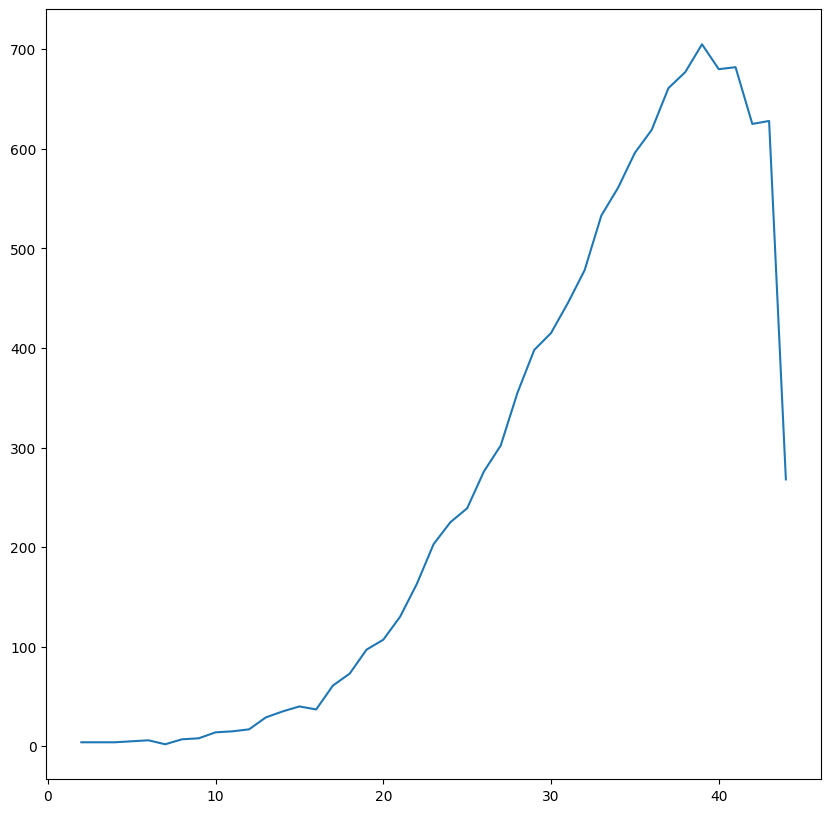

In [46]:
#draw yearly graph info，only show the year after it minus 1980
plt.figure(figsize=(10,10))
plt.plot([int(y)-1980 for y in year_infos.keys()], [info['Number of nodes'] for info in year_infos.values()], label='Number of nodes')

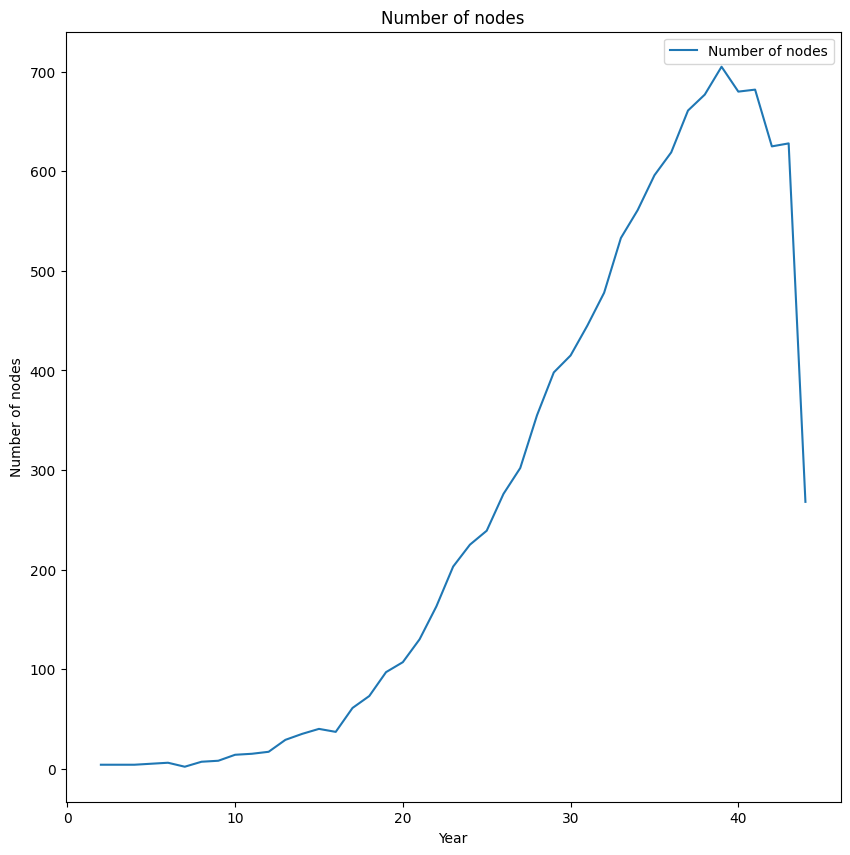

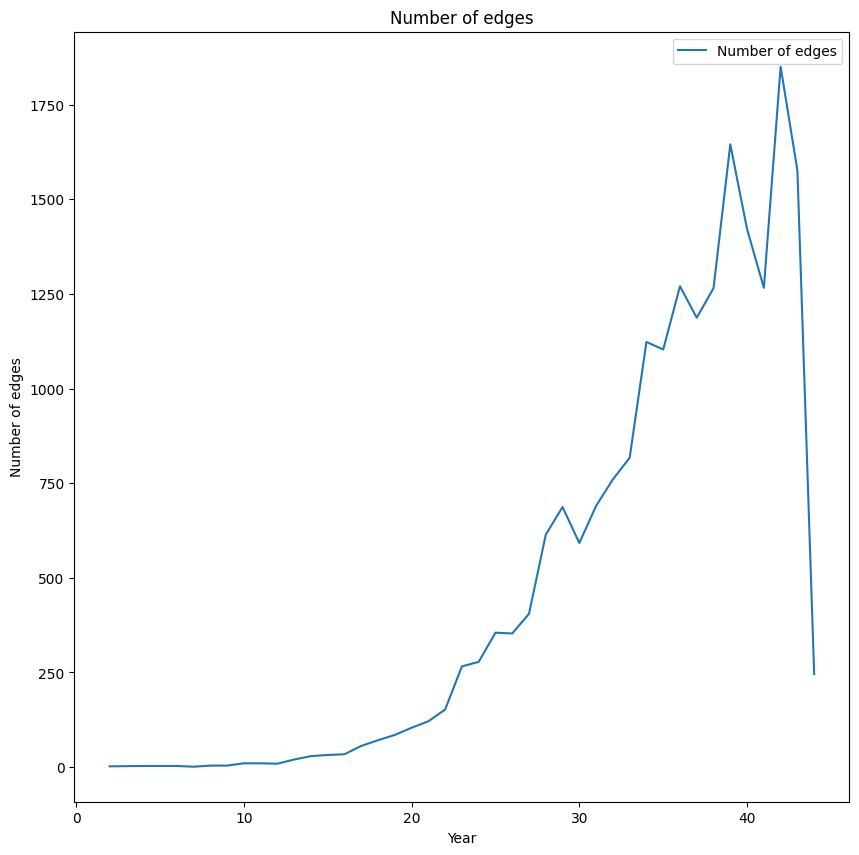

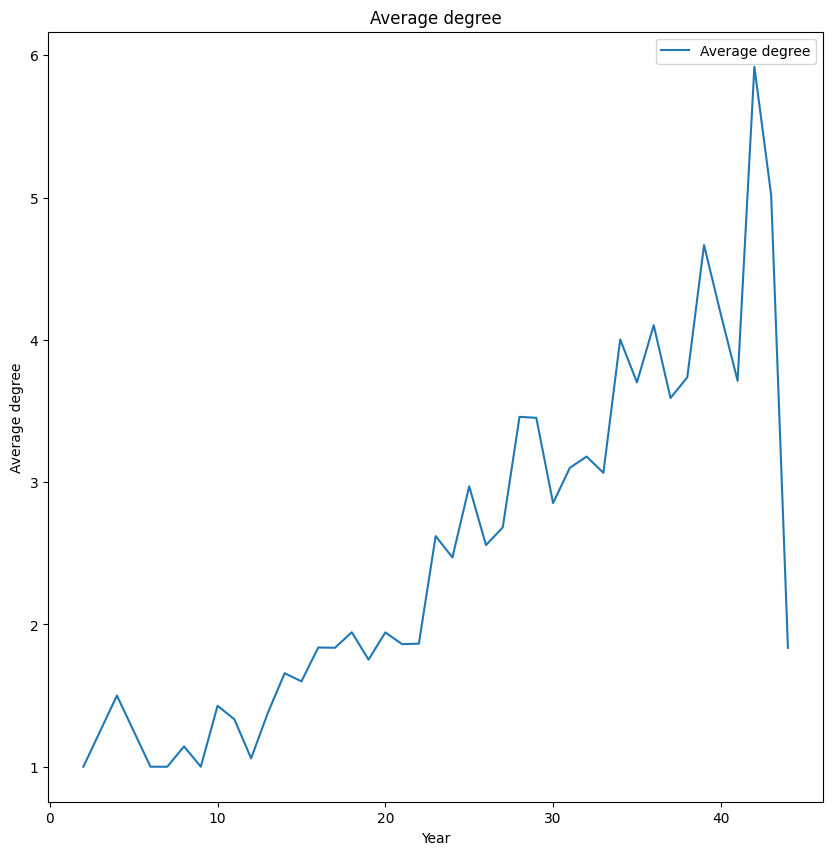

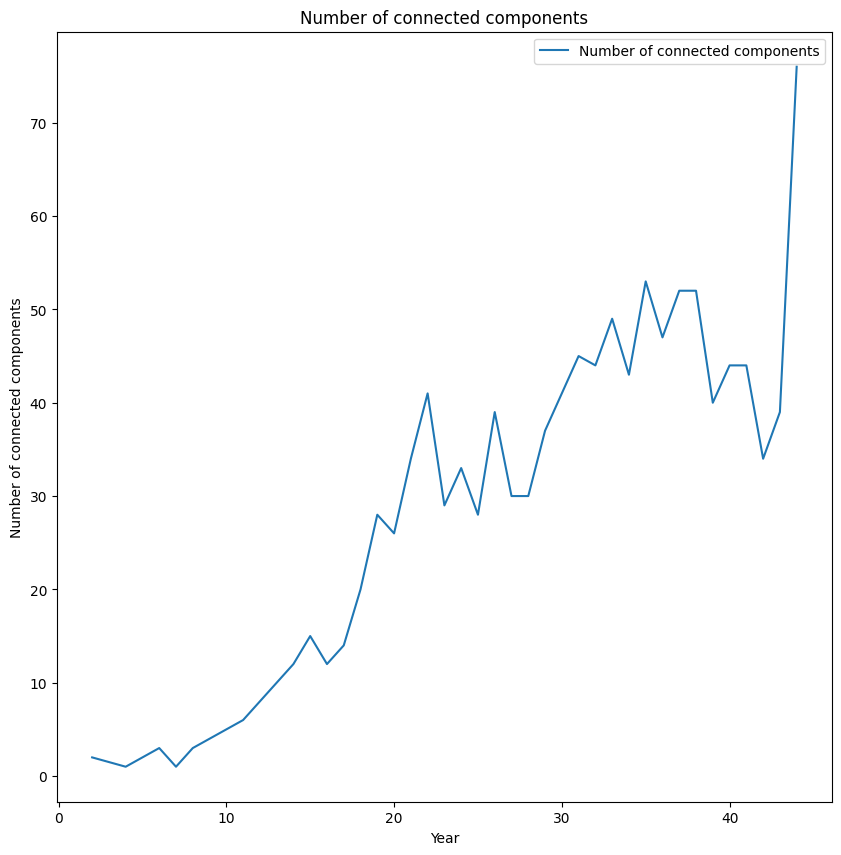

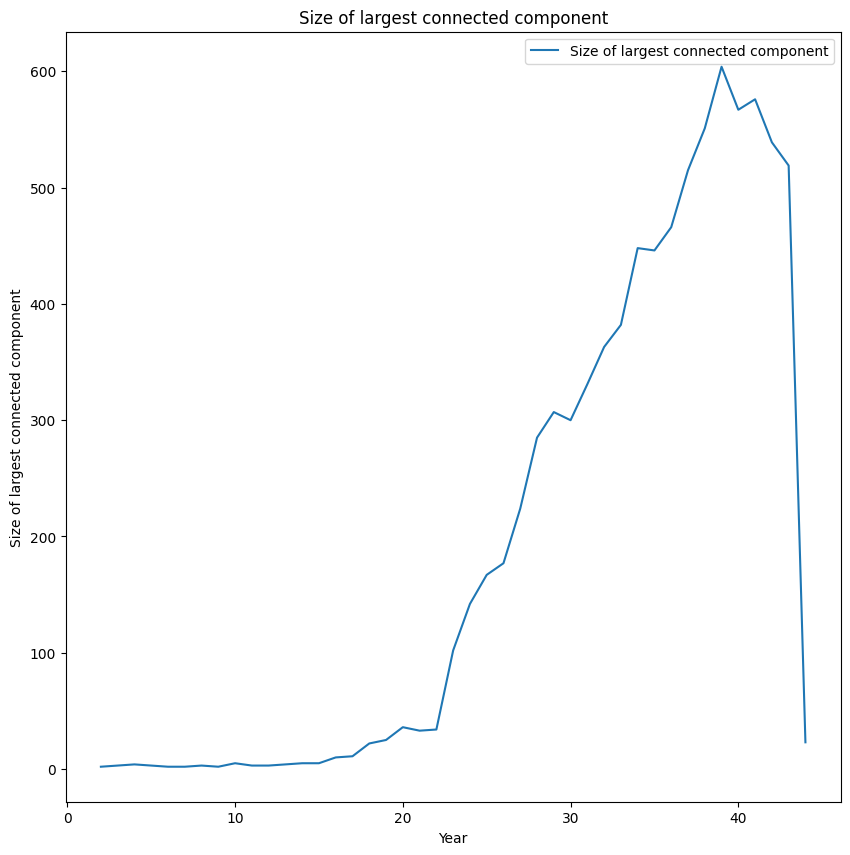

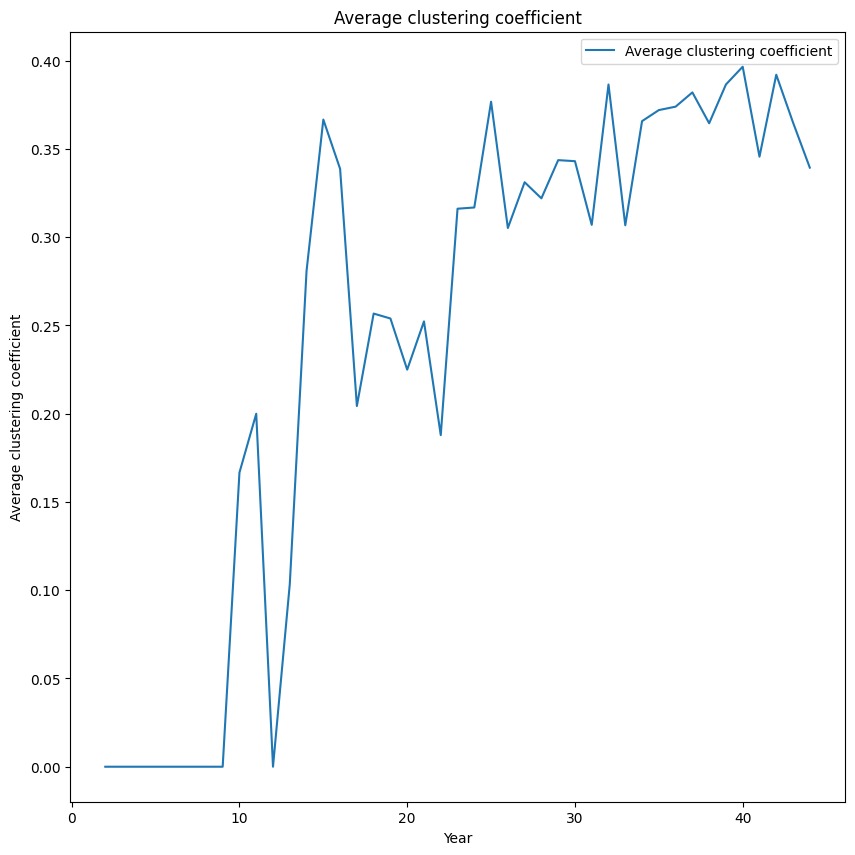

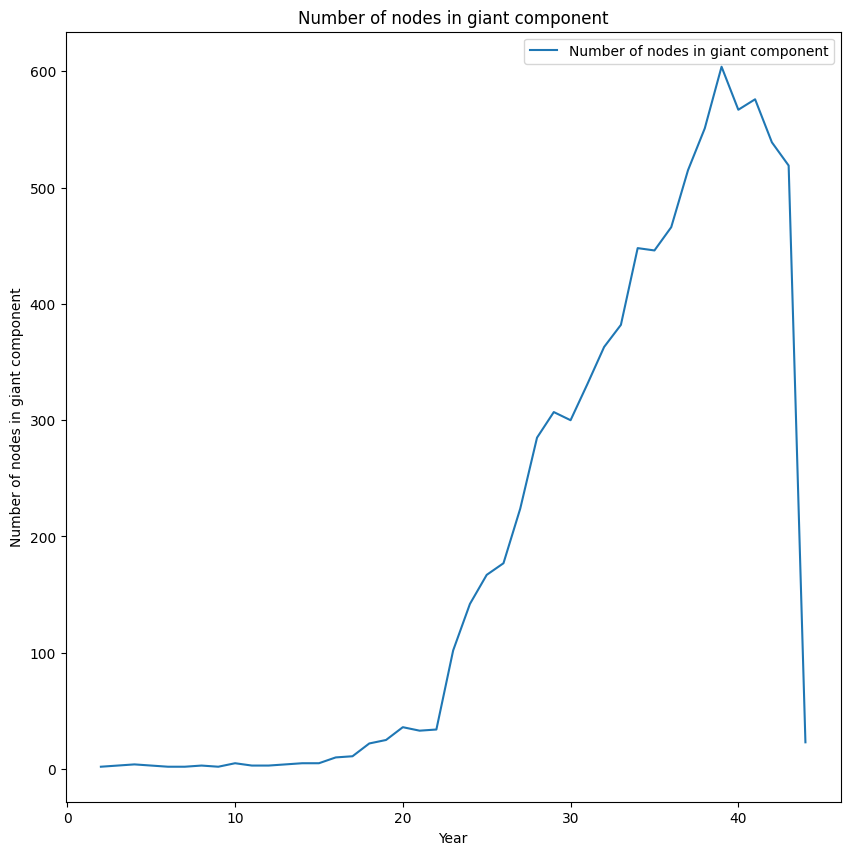

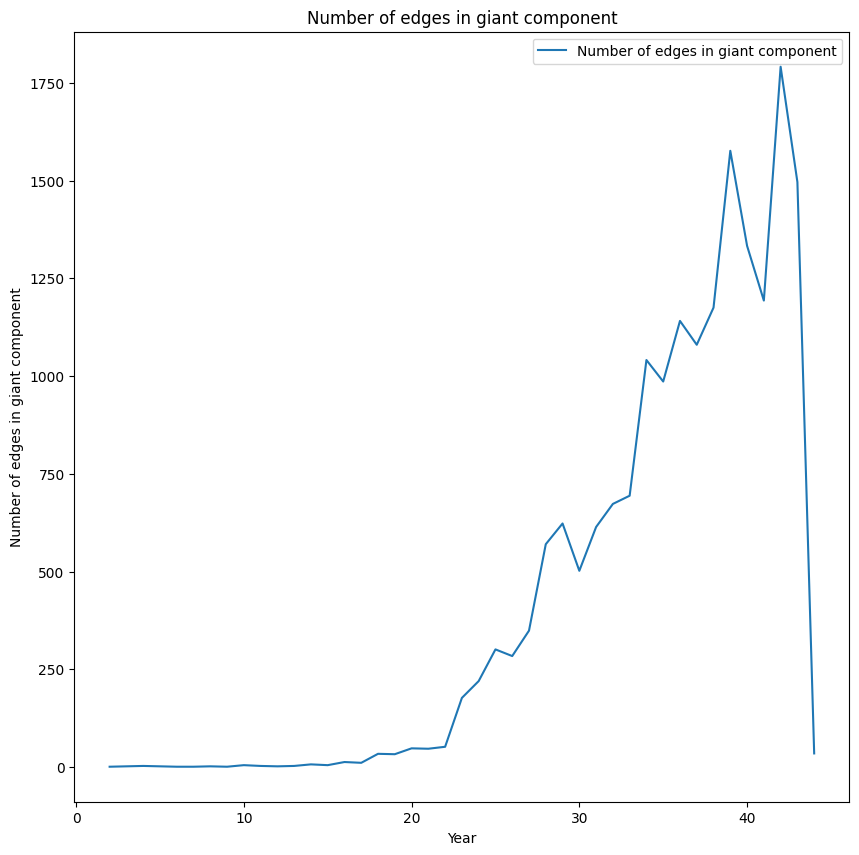

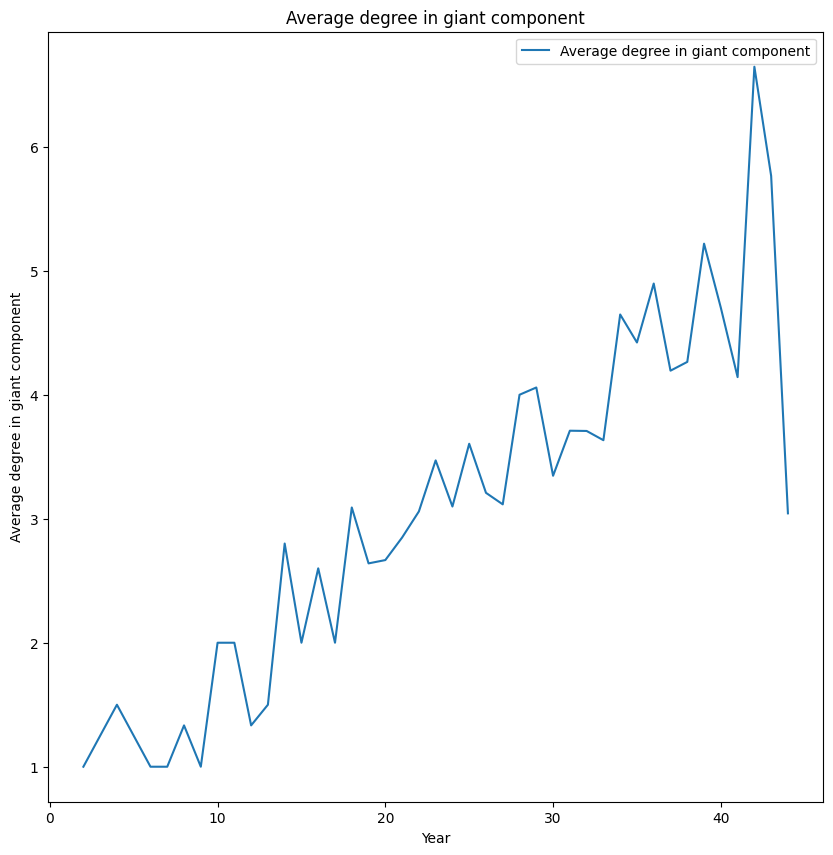

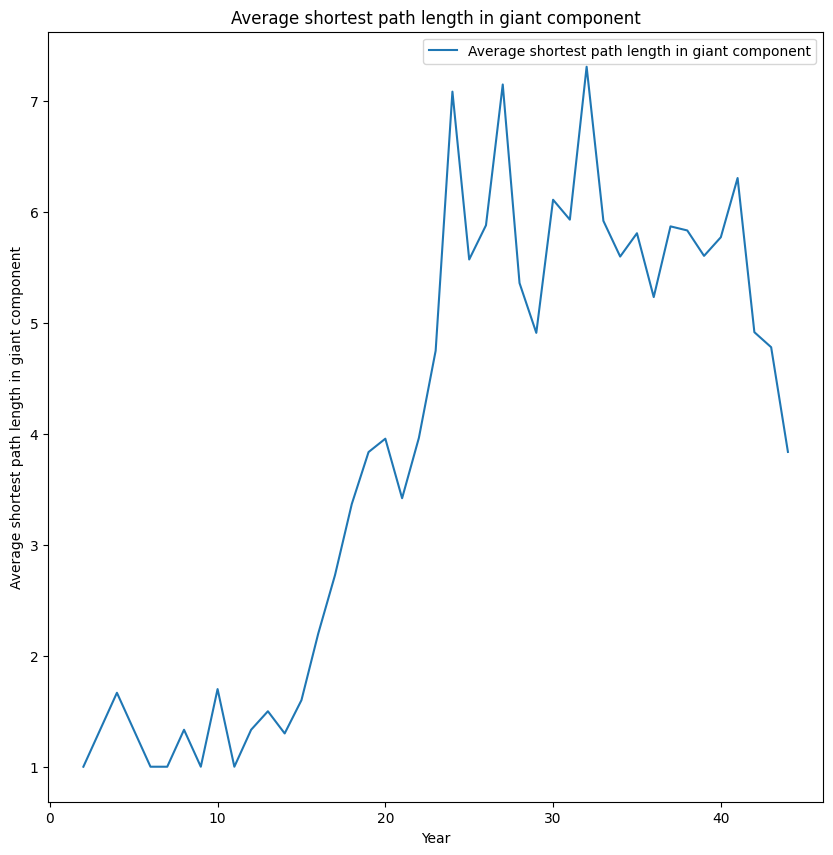

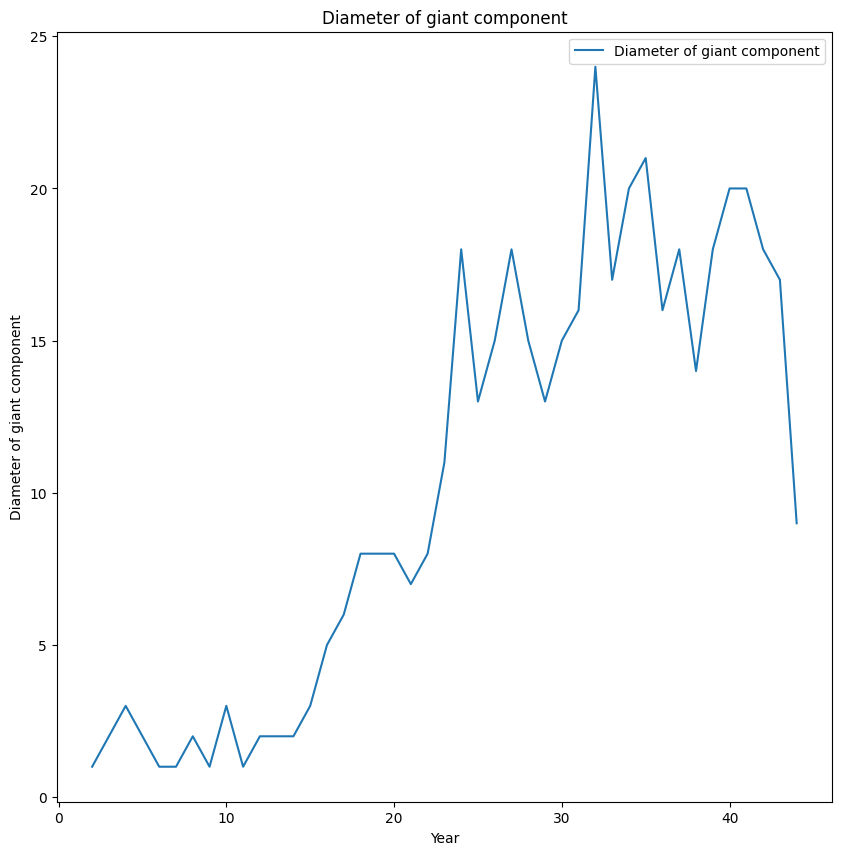

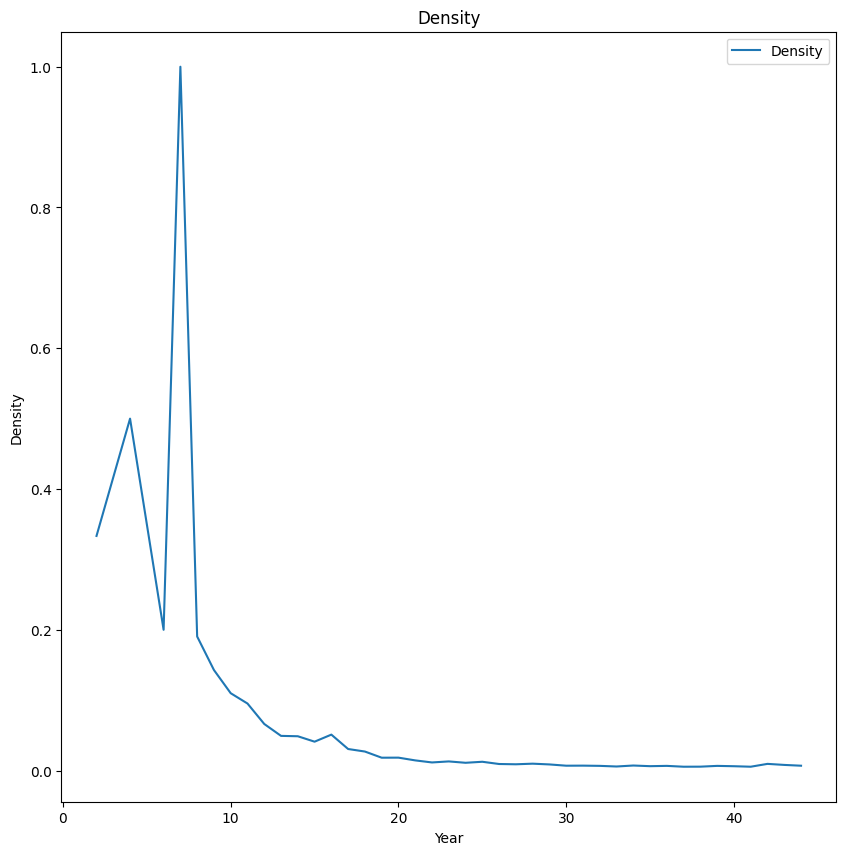

In [52]:
#draw yearly graph info
for key in year_infos["2023"].keys():
    plt.figure(figsize=(10,10))
    plt.plot([int(y)-1980 for y in year_infos.keys()], [info[key] for info in year_infos.values()], label=key)
    plt.xlabel('Year')
    plt.ylabel(key)
    plt.title(key)
    plt.legend()
    plt.savefig('../Result/YearChange/'+key+'.png')
    plt.show()